In [1]:
import pandas as pd

# Load the dataset
data_path = "no2_nganjuk_2022_2025.csv"
df = pd.read_csv(data_path)

# Rename columns and set date as index
df.rename(columns={'date': 'tanggal', 'NO2': 'no2'}, inplace=True)
df['tanggal'] = pd.to_datetime(df['tanggal'])
df = df.set_index('tanggal').sort_index()

# Basic statistics
stats = df.describe()

# Check missing values
missing = df.isnull().sum()

(stats, missing)


(       feature_index         no2
 count         1127.0  946.000000
 mean             0.0    0.000027
 std              0.0    0.000008
 min              0.0   -0.000009
 25%              0.0    0.000022
 50%              0.0    0.000027
 75%              0.0    0.000032
 max              0.0    0.000067,
 feature_index      0
 no2              181
 dtype: int64)

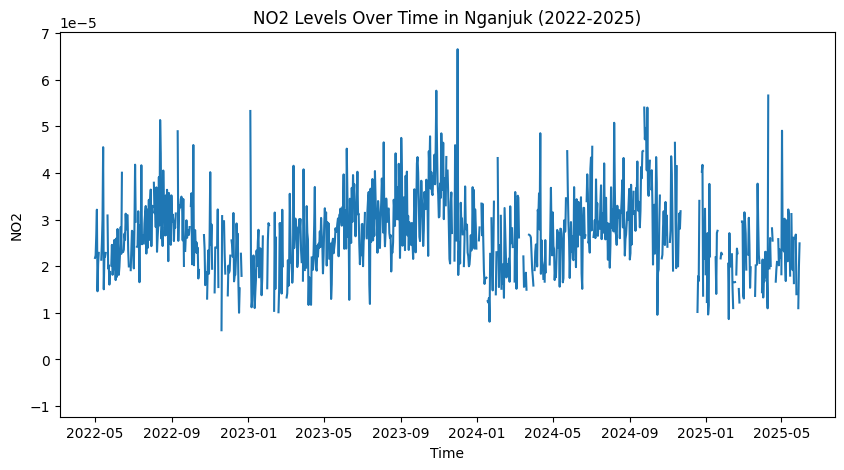

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['no2'])
plt.title("NO2 Levels Over Time in Nganjuk (2022-2025)")
plt.xlabel("Time")
plt.ylabel("NO2")
plt.show()


In [3]:
# Resample to daily and interpolate
df_daily = df.resample('D').mean()
df_interpolated = df_daily.interpolate(method='time')

# Drop any remaining missing values
df_interpolated = df_interpolated[['no2']].dropna()


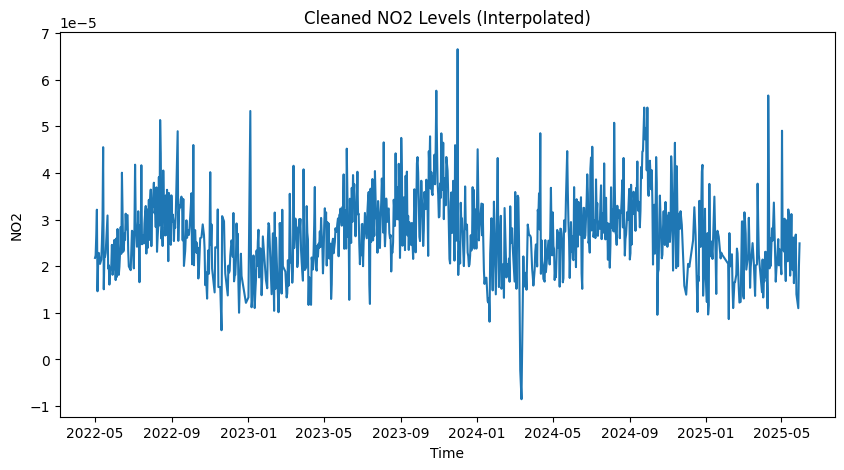

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df_interpolated.index, df_interpolated['no2'])
plt.title("Cleaned NO2 Levels (Interpolated)")
plt.xlabel("Time")
plt.ylabel("NO2")
plt.show()


In [5]:
from pycaret.time_series import *

# Setup PyCaret for time series
s = setup(data=df_interpolated,
          target='no2',
          session_id=123,
          fold=3,
          fh=12,              # forecast horizon 12 hari
          seasonal_period=7)  # misal pola mingguan


,Description,Value
0,session_id,123
1,Target,no2
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1126, 1)"
5,Transformed data shape,"(1126, 1)"
6,Transformed train set shape,"(1114, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [6]:
# Single Exponential Smoothing
model_ses = create_model('exp_smooth', seasonal=None)

# Double Exponential Smoothing
model_des = create_model('exp_smooth', trend='add', seasonal=None)

# Triple Exponential Smoothing
model_tes = create_model('exp_smooth', trend='add', seasonal='add')


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2025-04-12,0.5896,0.5568,0.0000,0.0000,0.2075,0.1804,-0.3430
1,2025-04-24,0.6059,0.8403,0.0000,0.0000,0.1448,0.1619,-0.1220
2,2025-05-06,0.6916,0.5913,0.0000,0.0000,0.2404,0.2105,-0.2532
Mean,NaT,0.6290,0.6628,0.0000,0.0000,0.1976,0.1843,-0.2394
SD,NaT,0.0448,0.1263,0.0000,0.0000,0.0396,0.0200,0.0908


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2025-04-12,0.5896,0.5568,0.0000,0.0000,0.2075,0.1804,-0.3430
1,2025-04-24,0.6059,0.8403,0.0000,0.0000,0.1448,0.1619,-0.1220
2,2025-05-06,0.6916,0.5913,0.0000,0.0000,0.2404,0.2105,-0.2532
Mean,NaT,0.6290,0.6628,0.0000,0.0000,0.1976,0.1843,-0.2394
SD,NaT,0.0448,0.1263,0.0000,0.0000,0.0396,0.0200,0.0908


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2025-04-12,0.6440,0.5983,0.0000,0.0000,0.2249,0.1950,-0.5504
1,2025-04-24,0.6109,0.8424,0.0000,0.0000,0.1462,0.1636,-0.1276
2,2025-05-06,0.6715,0.5869,0.0000,0.0000,0.2346,0.2047,-0.2348
Mean,NaT,0.6421,0.6758,0.0000,0.0000,0.2019,0.1878,-0.3042
SD,NaT,0.0248,0.1178,0.0000,0.0000,0.0396,0.0175,0.1795


In [7]:
# SES Forecast Plot
plot_model(model_ses, plot='forecast')

# DES Forecast Plot
plot_model(model_des, plot='forecast')

# TES Forecast Plot
plot_model(model_tes, plot='forecast')
